In [1]:
import numpy as np
import pandas  as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df_train = pd.read_csv("D:/Minor_Project/dataset/boneage-training-dataset.csv")
df_val = pd.read_csv("D:/Minor_Project/dataset/boneage-validation-dataset.csv")


In [5]:
print(df_train.head())
df_val.head()

     id  boneage   male
0  1377      180  False
1  1378       12  False
2  1379       94  False
3  1380      120   True
4  1381       82  False


,Image ID,male,Bone Age (months)
0,1386,False,30
1,1392,True,162
2,1397,False,18
3,1401,False,132
4,1410,True,57


In [6]:
df_train['filename'] = df_train['id'].apply(lambda x: str(x) + '.png')
df_train['gender'] = df_train['male'].apply(lambda x: 'male' if x else 'female')
df_train.drop(columns = 'male',inplace = True)
df_train.head()

,id,boneage,filename,gender
0,1377,180,1377.png,female
1,1378,12,1378.png,female
2,1379,94,1379.png,female
3,1380,120,1380.png,male
4,1381,82,1381.png,female


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12611 non-null  int64 
 1   boneage   12611 non-null  int64 
 2   filename  12611 non-null  object
 3   gender    12611 non-null  object
dtypes: int64(2), object(2)
memory usage: 394.2+ KB


In [8]:
df_val['filename'] = df_val['Image ID'].apply(lambda x: str(x) + '.png')
df_val['gender'] = df_val['male'].apply(lambda x: 'male' if x else 'female')
df_val.drop(columns = 'male',inplace = True)
df_val.head()

,Image ID,Bone Age (months),filename,gender
0,1386,30,1386.png,female
1,1392,162,1392.png,male
2,1397,18,1397.png,female
3,1401,132,1401.png,female
4,1410,57,1410.png,male


In [9]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Image ID           1425 non-null   int64 
 1   Bone Age (months)  1425 non-null   int64 
 2   filename           1425 non-null   object
 3   gender             1425 non-null   object
dtypes: int64(2), object(2)
memory usage: 44.7+ KB


In [10]:
df_train['boneage'].describe()

count    12611.000000
mean       127.320752
std         41.182021
min          1.000000
25%         96.000000
50%        132.000000
75%        156.000000
max        228.000000
Name: boneage, dtype: float64

<AxesSubplot:>

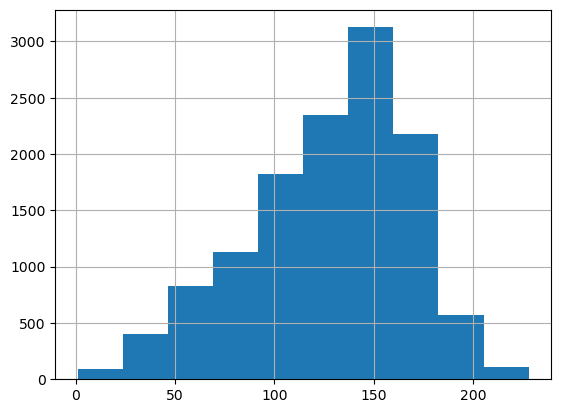

In [11]:
df_train['boneage'].hist(bins=10)

In [12]:
boneage_mean = (df_train['boneage'].mean() + df_val['Bone Age (months)'].mean())/2
boneage_std =(df_train['boneage'].std() + df_val['Bone Age (months)'].std())/2
print("mean: ",boneage_mean,"\nStandard deviation: ",boneage_std)

df_train['boneage_zscore'] = (df_train['boneage']-boneage_mean)/boneage_std
df_val['boneage_zscore']=((df_val['Bone Age (months)']-boneage_mean)/boneage_std)
print(df_train.head())
df_val.head()

mean:  127.23862147637749 
Standard deviation:  41.45201616171413
     id  boneage  filename  gender  boneage_zscore
0  1377      180  1377.png  female        1.272830
1  1378       12  1378.png  female       -2.780049
2  1379       94  1379.png  female       -0.801858
3  1380      120  1380.png    male       -0.174627
4  1381       82  1381.png  female       -1.091349


,Image ID,Bone Age (months),filename,gender,boneage_zscore
0,1386,30,1386.png,female,-2.345812
1,1392,162,1392.png,male,0.838593
2,1397,18,1397.png,female,-2.635303
3,1401,132,1401.png,female,0.114865
4,1410,57,1410.png,male,-1.694456


<AxesSubplot:>

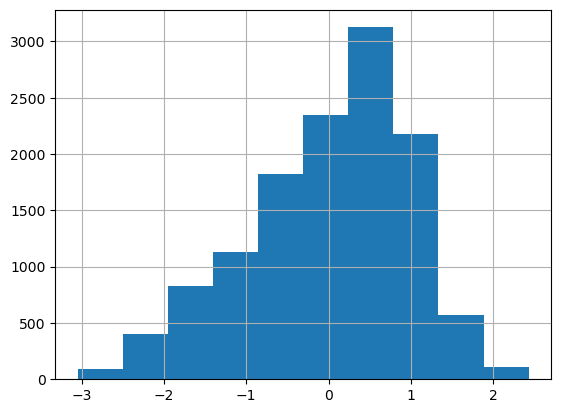

In [13]:
df_train['boneage_zscore'].hist(bins=10)

<AxesSubplot:>

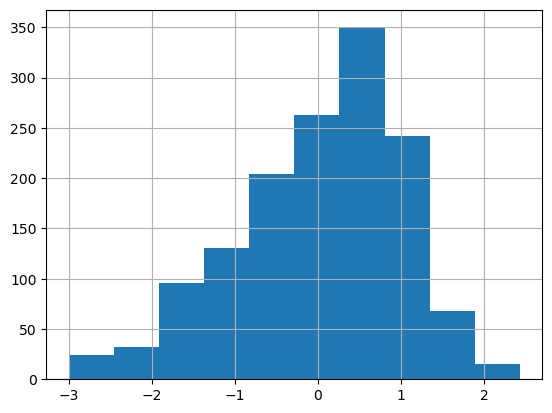

In [14]:
df_val['boneage_zscore'].hist(bins=10)

In [15]:
# Gender Distribution
df_train['gender'].value_counts()

male      6833
female    5778
Name: gender, dtype: int64

In [16]:
male = (len(df_train[df_train['gender']=='male'])/len(df_train)*100)
female = 100-male

print("Trainig male %: ", male)
print("Training female %: ",female)

print('validation male %: ',len(df_val[df_val['gender']=='male'])/len(df_val)*100)

Trainig male %:  54.182856236618825
Training female %:  45.817143763381175
validation male %:  54.24561403508772


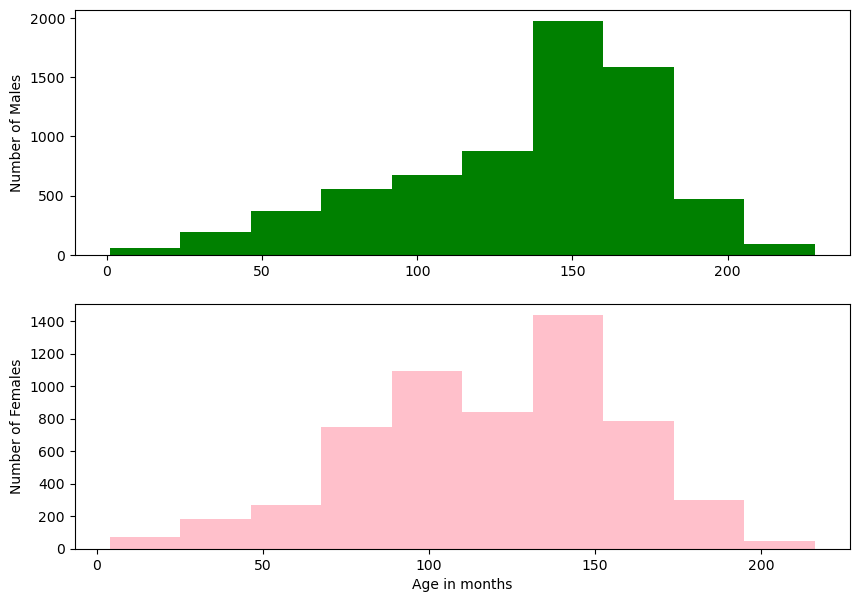

In [17]:
# Distribution of ages within each gender
male = df_train[df_train['gender']=='male']
female = df_train[df_train['gender']=='female']

fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'],color='green',bins=10)
ax[0].set_ylabel('Number of Males')

ax[1].hist(female['boneage'],color='pink',bins=10)
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of Females')
fig.set_size_inches((10,7))

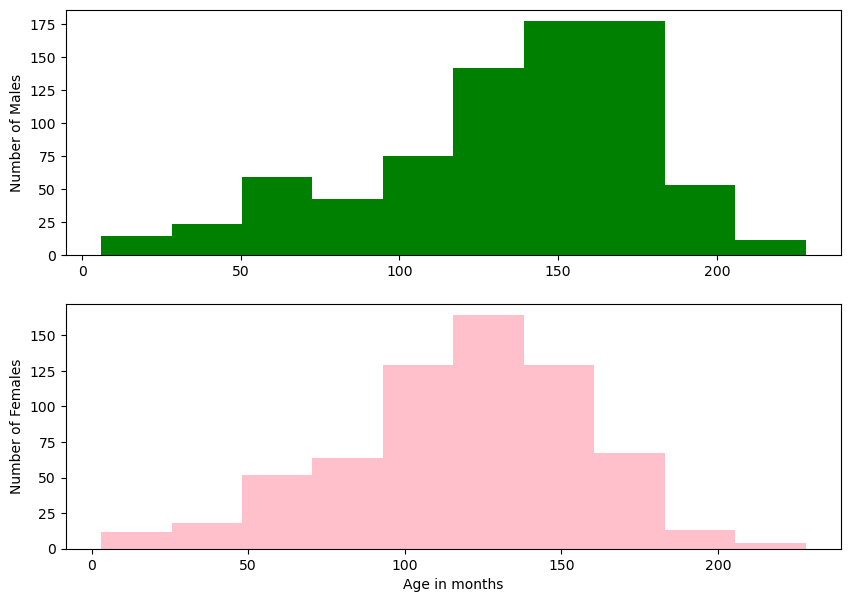

In [18]:
male = df_val[df_val['gender']=='male']
female = df_val[df_val['gender']=='female']

fig, ax = plt.subplots(2,1)
ax[0].hist(male['Bone Age (months)'],color='green',bins=10)
ax[0].set_ylabel('Number of Males')

ax[1].hist(female['Bone Age (months)'],color='pink',bins=10)
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of Females')
fig.set_size_inches((10,7))

In [19]:
# Saving Cleaned .CSV files
df_train.to_csv('./clean_dataset/df_train.csv',index=False)
df_val.to_csv('./clean_dataset/df_val.csv',index=False)
